In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('results.csv')

In [69]:
data.head(20)

,company,date,average_volatility,highest_volatility,lowest_volatility
0,AMZN,2023-04-03,0.225,0.800,0.087
1,AMZN,2023-04-04,0.264,0.710,0.090
2,AMZN,2023-04-05,0.243,1.160,0.092
3,AMZN,2023-04-06,0.234,0.740,0.086
4,AMZN,2023-04-10,0.222,0.920,0.095
5,AMZN,2023-04-11,0.221,0.860,0.079
6,AMZN,2023-04-12,0.277,1.010,0.075
7,AMZN,2023-04-13,0.243,0.805,0.080
8,AMZN,2023-04-14,0.283,1.220,0.120
9,BABA,2023-04-03,0.312,1.520,0.100


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company             90 non-null     object 
 1   date                90 non-null     object 
 2   average_volatility  90 non-null     float64
 3   highest_volatility  90 non-null     float64
 4   lowest_volatility   90 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.6+ KB


## 1) Graph the average volatility trend per company, Which company is the most volatile?

In [10]:
average_volatility = data.groupby('company')['average_volatility'].mean()
average_volatility

company
AMZN    0.245778
BABA    0.289444
BBY     0.144778
COST    0.683444
EBAY    0.078667
HD      0.435222
KR      0.075889
SHOP    0.176444
TGT     0.301111
WMT     0.176333
Name: average_volatility, dtype: float64

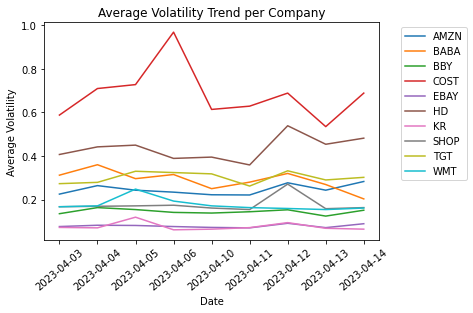

In [76]:
companies = data['company'].unique()

for company in companies:
    company_data = data[data['company'] == company]
    plt.plot(company_data['date'], company_data['average_volatility'], label=company)

plt.xlabel('Date')
plt.ylabel('Average Volatility')
plt.title('Average Volatility Trend per Company')
plt.xticks(rotation=40)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

As you can see from Average volatility trend per company, company COST is the most volatile company, and the average volatility number is 0.683444.

## 2)	Graph the daily highest volatility per company, Do the findings from this graph support your conclusion from the first graph?


In [24]:
grouped_data = data.groupby(['company', 'date'])['highest_volatility'].max().unstack()
grouped_data

date,2023-04-03,2023-04-04,2023-04-05,2023-04-06,2023-04-10,2023-04-11,2023-04-12,2023-04-13,2023-04-14
company,,,,,,,,,
AMZN,0.800,0.710,1.160,0.740,0.920,0.860,1.010,0.805,1.220
BABA,1.520,1.598,1.050,1.170,1.620,2.625,1.240,1.380,0.762
BBY,0.357,0.579,0.510,0.580,0.530,0.660,0.695,0.372,0.790
COST,1.530,2.111,3.600,4.890,2.390,4.140,1.780,1.640,2.230
EBAY,0.210,0.190,0.210,0.340,0.410,0.250,0.330,0.240,0.310
HD,2.345,1.450,1.695,1.795,2.010,1.180,2.500,2.185,1.992
KR,0.210,0.260,0.890,0.330,0.300,0.330,0.670,0.290,0.400
SHOP,0.450,0.460,0.609,0.940,0.740,0.530,1.500,0.620,0.572
TGT,1.560,0.850,1.370,2.340,0.705,1.470,0.995,1.180,0.920


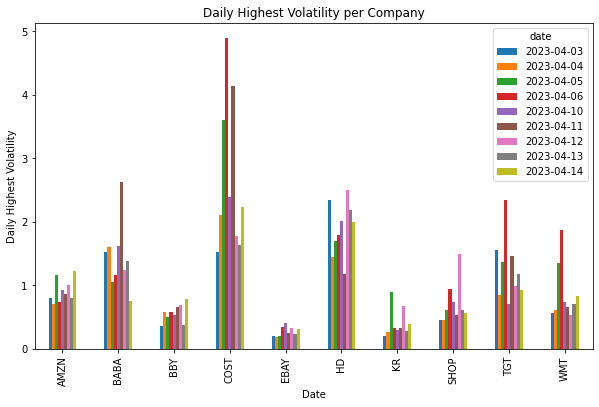

In [39]:
fig, ax = plt.subplots(figsize=(10, 6)) 
grouped_data.plot(kind='bar', ax=ax)
plt.xlabel('Date')
plt.ylabel('Daily Highest Volatility')
plt.title('Daily Highest Volatility per Company')
plt.show()


Company COST exhibited the highest daily volatility, reaching approximately 5 on April 6, 2023. The second-highest daily volatility was observed on April 11, 2023, with a value of around 4.
TGT had a daily highest volatility of approximately 2.5, while WMT recorded a daily highest volatility of approximately 2. Both TGT and WMT experienced their highest volatilizes on the same day as COST.

Therefore, these findings in the second chart are consistent with the conclusion reached in the first chart, which identifies COST companies as the most volatile companies based on the highest average volatility.